In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras import models, layers
import keras


# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Set numeric type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize RGB value to [0, 1]
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding categorcical variables
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Reshape the dataset to feed into the convolution layer
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1) 

Using TensorFlow backend.


In [15]:
#activation = 'tanh'
#activation = 'relu'
#Start Sequential
model = Sequential()

#Convolutional Layer C1
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# Pooling Layer S2 
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

#Convolutional Layer  C3 
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# Pooling Layer S4 
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

#Fully Connected Convolutional Layer S4 
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
#Flatten the CNN output before feeding it next Fully connected layer
model.add(layers.Flatten())

#Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

#Output Layer with softmax activation (10 classes)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"]) 
#model.compile(loss=keras.losses.mean_squared_error, optimizer='rmsprop', metrics=["accuracy"]) 

In [16]:
hist = model.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 120s 2ms/step - loss: 0.6808 - acc: 0.8276 - val_loss: 0.3354 - val_acc: 0.9078
Epoch 2/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.3092 - acc: 0.9126 - val_loss: 0.2637 - val_acc: 0.9252
Epoch 3/10
60000/60000 [==============================] - 128s 2ms/step - loss: 0.2539 - acc: 0.9271 - val_loss: 0.2246 - val_acc: 0.9374
Epoch 4/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.2196 - acc: 0.9367 - val_loss: 0.1984 - val_acc: 0.9443
Epoch 5/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1952 - acc: 0.9440 - val_loss: 0.1779 - val_acc: 0.9509
Epoch 6/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.1759 - acc: 0.9497 - val_loss: 0.1626 - val_acc: 0.9535
Epoch 7/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1606 - acc: 0.9542 - val_loss: 0.1497 - 

In [17]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100)) 

10000/10000 [==============================] - 10s 988us/step
Test loss 0.1245, accuracy 96.44%


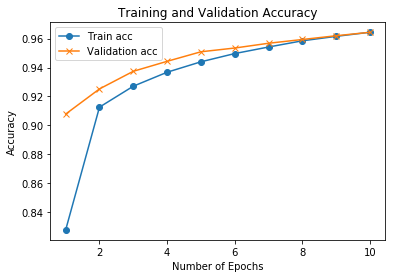

In [18]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['acc'], 'o-')
ax.plot([None] + hist.history['val_acc'], 'x-')

ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training and Validation Accuracy')
ax.set_xlabel('Number of Epochs')
ax.set_ylabel('Accuracy') 
plt.show()

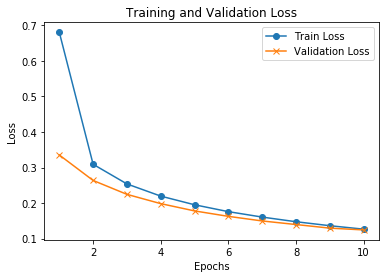

In [19]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training and Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss') 
plt.show()

In [ ]:
"""#LeNet-5 Architecture
from tensorflow.contrib.layers import flatten
x = tf.placeholder(tf.float32, (None, 32, 32, 1)) #placeholder for a batch of input images
y = tf.placeholder(tf.int32, (None)) #placeholder for a batch of output images
one_hot_y = tf.one_hot(y, 10) #one hot encoding the ouput classes
 
mu = 0
sigma = 0.1
#Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
conv1_w = tf.Variable(tf.truncated_normal(shape = [5,5,1,6],mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv1 = tf.nn.conv2d(x,conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b 
# Activation.
conv1 = tf.nn.relu(conv1)

#Pooling. Input = 28x28x6. Output = 14x14x6.
pool_1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

#Layer 2: Convolutional. Output = 10x10x16.
conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,6,16], mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(16))
conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b
#Activation.
conv2 = tf.nn.relu(conv2)

#Pooling. Input = 10x10x16. Output = 5x5x16.
pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID') 

#Flatten. Input = 5x5x16. Output = 400.
fc1 = flatten(pool_2)

#Layer 3: Fully Connected. Input = 400. Output = 120.
fc1_w = tf.Variable(tf.truncated_normal(shape = (400,120), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(120))
fc1 = tf.matmul(fc1,fc1_w) + fc1_b

#Activation.
fc1 = tf.nn.relu(fc1)

#Layer 4: Fully Connected. Input = 120. Output = 84.
fc2_w = tf.Variable(tf.truncated_normal(shape = (120,84), mean = mu, stddev = sigma))
fc2_b = tf.Variable(tf.zeros(84))
fc2 = tf.matmul(fc1,fc2_w) + fc2_b
#Activation.
fc2 = tf.nn.relu(fc2)

#Layer 5: Fully Connected. Input = 84. Output = 10.
fc3_w = tf.Variable(tf.truncated_normal(shape = (84,10), mean = mu , stddev = sigma))
fc3_b = tf.Variable(tf.zeros(10))
logits = tf.matmul(fc2, fc3_w) + fc3_b
"""